In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
img=cv2.imread("../images_dataset/maria_sharapova/OD-BG400_20ODDa_8V_20150520191535.jpg")
img.shape

(951, 634, 3)

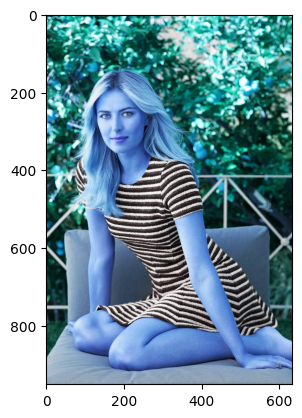

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape


(951, 634)

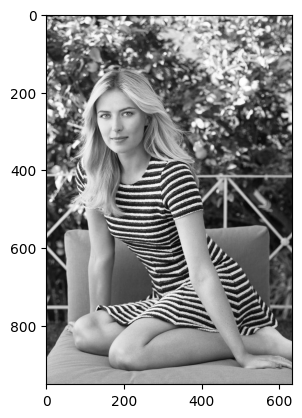

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[116, 209, 129, 129]], dtype=int32)

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(116, 209, 129, 129)

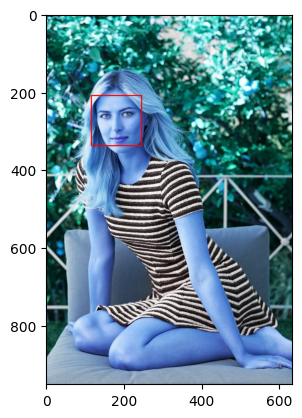

In [8]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

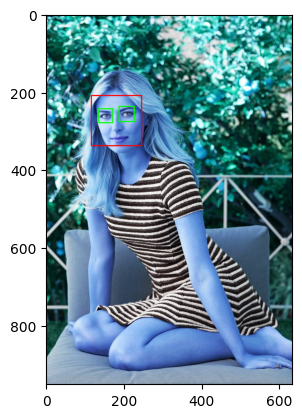

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

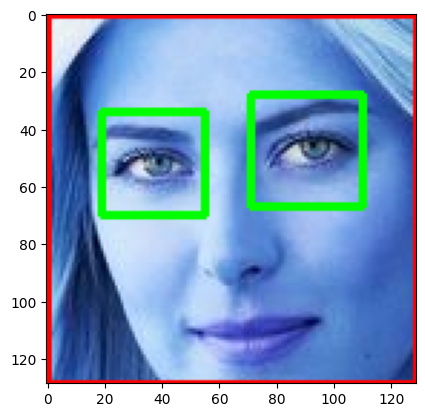

In [10]:
plt.imshow(roi_color,cmap='gray')

In [11]:
cropped_img=np.array(roi_color)
cropped_img.shape

(129, 129, 3)

In [12]:
def get_cropped_image(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        
        roi_color = img[y:y+h, x:x+w]
        #plt.imshow(roi_color,cmap='gray')
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

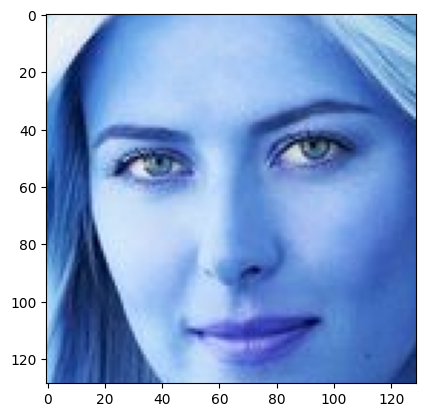

In [13]:
#function for crop images 
cropped_image = get_cropped_image("../images_dataset/maria_sharapova/OD-BG400_20ODDa_8V_20150520191535.jpg")
plt.imshow(cropped_image)

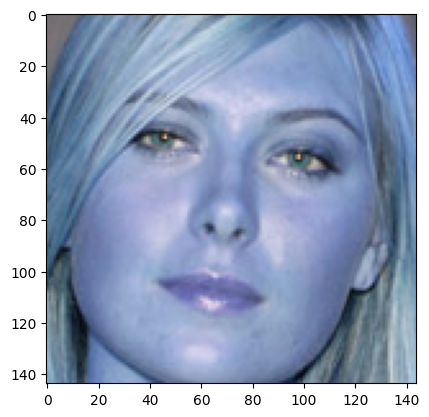

In [14]:
cropped_image = get_cropped_image("../images_dataset/maria_sharapova/MV5BMTkwNDE4OTUxN15BMl5BanBnXkFtZTYwNzMyMjA0.jpg")
plt.imshow(cropped_image)

In [15]:
path_to_data = "../images_dataset/"
path_to_cr_data = "../images_dataset/cropped/"

In [16]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    print(entry.path)
    if entry.is_dir():
        img_dirs.append(entry.path)

../images_dataset/.DS_Store
../images_dataset/maria_sharapova
../images_dataset/neymar_jr 
../images_dataset/virat_kohli
../images_dataset/roger_fedrer
../images_dataset/lionel_messi
../images_dataset/lebron_james 
../images_dataset/ab_de_villiers 
../images_dataset/cropped
../images_dataset/serena_williams
../images_dataset/ronaldo 


In [17]:
img_dirs

['../images_dataset/maria_sharapova',
 '../images_dataset/neymar_jr ',
 '../images_dataset/virat_kohli',
 '../images_dataset/roger_fedrer',
 '../images_dataset/lionel_messi',
 '../images_dataset/lebron_james ',
 '../images_dataset/ab_de_villiers ',
 '../images_dataset/cropped',
 '../images_dataset/serena_williams',
 '../images_dataset/ronaldo ']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
def get_cropped_image(image_path):
    img=cv2.imread(image_path)
    gray=img
    faces=face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        
        roi_color = img[y:y+h, x:x+w]
        #plt.imshow(roi_color,cmap='gray')
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    print(img_dir)
    #print("Hi")
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        #print("HI")
        if roi_color is not None:
            #print("BYE")
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

../images_dataset/maria_sharapova
Generating cropped images in folder:  ../images_dataset/cropped/maria_sharapova
../images_dataset/neymar_jr 
Generating cropped images in folder:  ../images_dataset/cropped/neymar_jr 
../images_dataset/virat_kohli
Generating cropped images in folder:  ../images_dataset/cropped/virat_kohli
../images_dataset/roger_fedrer
Generating cropped images in folder:  ../images_dataset/cropped/roger_fedrer
../images_dataset/lionel_messi
Generating cropped images in folder:  ../images_dataset/cropped/lionel_messi
../images_dataset/lebron_james 
Generating cropped images in folder:  ../images_dataset/cropped/lebron_james 
../images_dataset/ab_de_villiers 
Generating cropped images in folder:  ../images_dataset/cropped/ab_de_villiers 


libpng warning: iCCP: known incorrect sRGB profile


../images_dataset/cropped
../images_dataset/serena_williams
Generating cropped images in folder:  ../images_dataset/cropped/serena_williams
../images_dataset/ronaldo 
Generating cropped images in folder:  ../images_dataset/cropped/ronaldo 


In [21]:
celebrity_file_names_dict

{'maria_sharapova': ['../images_dataset/cropped/maria_sharapova/maria_sharapova1.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova2.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova3.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova4.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova5.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova6.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova7.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova8.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova9.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova10.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova11.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova12.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova13.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova14.png',
  '../images_dataset/cro

In [22]:
del celebrity_file_names_dict['cropped']

In [23]:
celebrity_file_names_dict

{'maria_sharapova': ['../images_dataset/cropped/maria_sharapova/maria_sharapova1.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova2.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova3.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova4.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova5.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova6.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova7.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova8.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova9.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova10.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova11.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova12.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova13.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova14.png',
  '../images_dataset/cro

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

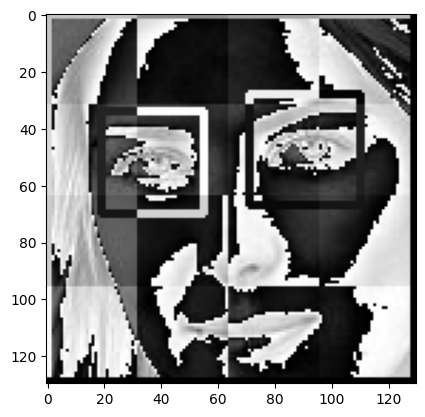

In [25]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [55]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'maria_sharapova': 0,
 'neymar_jr ': 1,
 'virat_kohli': 2,
 'roger_fedrer': 3,
 'lionel_messi': 4,
 'lebron_james ': 5,
 'ab_de_villiers ': 6,
 'serena_williams': 7,
 'ronaldo ': 8}

In [56]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',9)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

/opt/homebrew/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(
[ WARN:0@2511.893] global loadsave.cpp:244 findDecoder imread_('../images_dataset/cropped/lebron_james /lebron_james 1.png'): can't open/read file: check file path/integrity
[ WARN:0@2512.009] global loadsave.cpp:244 findDecoder imread_('../images_dataset/cropped/ab_de_villiers /ab_de_villiers 5.png'): can't open/read file: check file path/integrity


In [57]:
X[0]

array([[169],
       [214],
       [222],
       ...,
       [164],
       [168],
       [187]], dtype=uint8)

In [72]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [73]:
len(X)

377

In [74]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(377, 4096)

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)


In [77]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5263157894736842

In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(kernel='linear', C=1, random_state=42),X_train,y_train,cv=5)

array([0.49122807, 0.56140351, 0.625     , 0.60714286, 0.60714286])

In [79]:
cross_val_score(SVC(kernel='rbf', C=1, random_state=42),X_train,y_train,cv=5)

array([0.43859649, 0.49122807, 0.42857143, 0.5       , 0.46428571])

In [80]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
model_params = {
    'svm': {
        'model':svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [81]:
scores=[]
best_estimators={}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.620865,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.496554,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.652757,{'logisticregression__C': 1}


In [82]:
best_estimators['svm'].score(X_test,y_test)

0.5789473684210527

In [83]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5684210526315789

In [84]:
best_clf = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  0,  1,  2,  0,  0],
       [ 0,  4,  2,  1,  5,  2,  0,  0,  2],
       [ 0,  0,  5,  0,  1,  0,  0,  0,  1],
       [ 0,  2,  0,  6,  0,  0,  0,  0,  2],
       [ 0,  2,  1,  1, 16,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  1,  1,  1],
       [ 2,  0,  2,  1,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  0,  7]])

Text(95.72222222222221, 0.5, 'Truth')

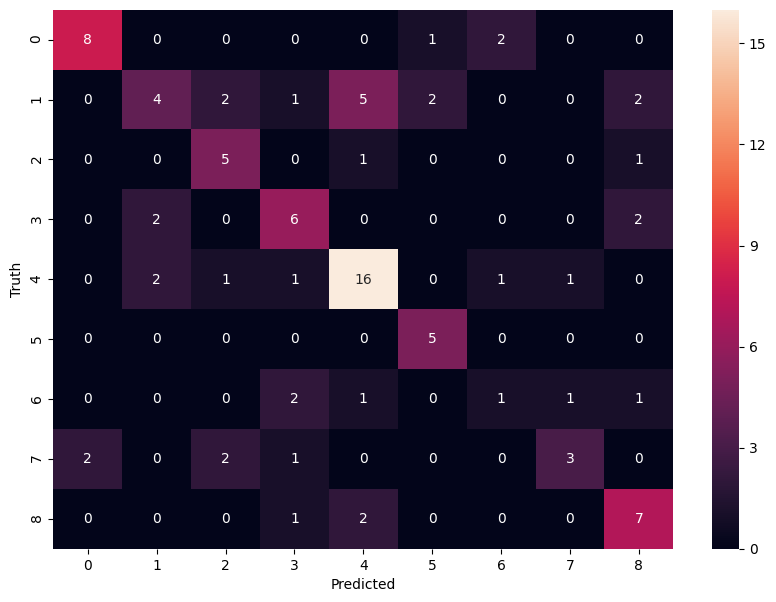

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
class_dict

{'maria_sharapova': 0,
 'neymar_jr ': 1,
 'virat_kohli': 2,
 'roger_fedrer': 3,
 'lionel_messi': 4,
 'lebron_james ': 5,
 'ab_de_villiers ': 6,
 'serena_williams': 7,
 'ronaldo ': 8}

In [91]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, '../server/artifacts/saved1_model.pkl') 

['../server/artifacts/saved1_model.pkl']

In [88]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [89]:
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [47]:
with open("save_model.pkl","wb") as f:
    f.write(best_clf)

TypeError: a bytes-like object is required, not 'Pipeline'